In [28]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [146]:
Qmax = 100.0
frate_sig = 3.0
frate_Theta = 10.0
def frate(v):
    return 100.0/(1. + np.exp( (frate_Theta - v)/frate_sig ))

def vectorfield(t, w, p):
    """
    Arguments:
        w : vector of state variables:
            w = [V_lE, V_lP, V_lS, V_dP, V_dS]
        t : time
        p : vector of parameters:
            p = [nu_lElP, nu_lElS, nu_lEdS, nu_lEdP, A_lE, tau_lE,
                nu_lPlS, nu_lPlE, nu_lPdS, nu_lPdP, A_lP, tau_lP,
                 nu_lSlE, A_lS, tau_lS,
                 A_dP, Stim_dP, tau_dP,
                 A_dS, Stim_dS, tau_dS
                 ]
    
    """
    
    V_lE, V_lP, V_lS, V_dP, V_dS = w
    
    nu_lElP, nu_lElS, nu_lEdS, nu_lEdP, A_lE, tau_lE, \
                nu_lPlS, nu_lPlE, nu_lPdS, nu_lPdP, A_lP, tau_lP, Stim_lP, \
                 nu_lSlE,  nu_lSdS, A_lS, tau_lS, Stim_lS, \
                 A_dP, Stim_dP, tau_dP,\
                 A_dS, Stim_dS, tau_dS   = p
    
#     f = [ (- V_lE + A_lE + nu_lElP*frate(V_lP) + nu_lElS*frate(V_lS) + nu_lEdS*frate(V_dS) + nu_lEdP*frate(V_dP))/tau_lE,
#              (- V_lP + A_lP + nu_lPlS*frate(V_lS) + nu_lPlE*frate(V_lE) + nu_lPdS*frate(V_dS) + nu_lPdP*frate(V_dP))/tau_lP,
#              (- V_lS + A_lS + nu_lSlE)/tau_lS,
#              (- V_dP + A_dP + Stim_dP * np.exp( -0.5*((0.51-t)/0.1)**2))/tau_dP,
#              (- V_dS + A_dS + Stim_dS * np.exp( -0.5*((0.51-t)/0.1)**2))/tau_dS ]
    
    
    if 0.5 < t < 0.52:
        f = [ (- V_lE + A_lE + nu_lElP*frate(V_lP) + nu_lElS*frate(V_lS) + nu_lEdS*frate(V_dS) + nu_lEdP*frate(V_dP))/tau_lE,
             (- V_lP + A_lP + nu_lPlS*frate(V_lS) + nu_lPlE*frate(V_lE) + nu_lPdS*frate(V_dS) + nu_lPdP*frate(V_dP)  + Stim_lP)/tau_lP,
             (- V_lS + A_lS + nu_lSlE*frate(V_lE) + nu_lSdS*frate(V_dS)  + Stim_lS )/tau_lS,
             (- V_dP + A_dP + Stim_dP)/tau_dP,
             (- V_dS + A_dS + Stim_dS)/tau_dS ]
#         print('STIM!')
    else:
        f = [ (- V_lE + A_lE + nu_lElP*frate(V_lP) + nu_lElS*frate(V_lS) + nu_lEdS*frate(V_dS) + nu_lEdP*frate(V_dP))/tau_lE,
             (- V_lP + A_lP + nu_lPlS*frate(V_lS) + nu_lPlE*frate(V_lE) + nu_lPdS*frate(V_dS) + nu_lPdP*frate(V_dP))/tau_lP,
             (- V_lS + A_lS + nu_lSlE*frate(V_lE) + nu_lSdS*frate(V_dS))/tau_lS,
             (- V_dP + A_dP)/tau_dP,
             (- V_dS + A_dS)/tau_dS ]
        
    return f

def func(t, w):
    """
    Arguments:
        w : vector of state variables:
            w = [V_lE, V_lP, V_lS, V_dP, V_dS]
        t : time
        p : vector of parameters:
            p = [nu_lElP, nu_lElS, nu_lEdS, nu_lEdP, A_lE, tau_lE,
                nu_lPlS, nu_lPlE, nu_lPdS, nu_lPdP, A_lP, tau_lP,
                 nu_lSlE, A_lS, tau_lS,
                 A_dP, Stim_dP, tau_dP,
                 A_dS, Stim_dS, tau_dS
                 ]
    
    """
    
    V_lE, V_lP, V_lS, V_dP, V_dS = w
    
    nu_lElP, nu_lElS, nu_lEdS, nu_lEdP, A_lE, tau_lE, \
                nu_lPlS, nu_lPlE, nu_lPdS, nu_lPdP, A_lP, tau_lP, stim_lP,\
                 nu_lSlE,  nu_lSdS, A_lS, tau_lS, stim_lS,\
                 A_dP, Stim_dP, tau_dP,\
                 A_dS, Stim_dS, tau_dS   = p
    
#     f = [ (- V_lE + A_lE + nu_lElP*frate(V_lP) + nu_lElS*frate(V_lS) + nu_lEdS*frate(V_dS) + nu_lEdP*frate(V_dP))/tau_lE,
#              (- V_lP + A_lP + nu_lPlS*frate(V_lS) + nu_lPlE*frate(V_lE) + nu_lPdS*frate(V_dS) + nu_lPdP*frate(V_dP))/tau_lP,
#              (- V_lS + A_lS + nu_lSlE)/tau_lS,
#              (- V_dP + A_dP + Stim_dP * np.exp( -0.5*((0.51-t)/0.1)**2))/tau_dP,
#              (- V_dS + A_dS + Stim_dS * np.exp( -0.5*((0.51-t)/0.1)**2))/tau_dS ]
    
    
    if 0.5 < t < 0.55:
        f = [ (- V_lE + A_lE + nu_lElP*frate(V_lP) + nu_lElS*frate(V_lS) + nu_lEdS*frate(V_dS) + nu_lEdP*frate(V_dP))/tau_lE,
             (- V_lP + A_lP + nu_lPlS*frate(V_lS) + nu_lPlE*frate(V_lE) + nu_lPdS*frate(V_dS) + nu_lPdP*frate(V_dP)  + Stim_lP)/tau_lP,
             (- V_lS + A_lS + nu_lSlE*frate(V_lE) + nu_lSdS*frate(V_dS)  + Stim_lS )/tau_lS,
             (- V_dP + A_dP + Stim_dP)/tau_dP,
             (- V_dS + A_dS + Stim_dS)/tau_dS ]
        print('STIM!')
    else:
        f = [ (- V_lE + A_lE + nu_lElP*frate(V_lP) + nu_lElS*frate(V_lS) + nu_lEdS*frate(V_dS) + nu_lEdP*frate(V_dP))/tau_lE,
             (- V_lP + A_lP + nu_lPlS*frate(V_lS) + nu_lPlE*frate(V_lE) + nu_lPdS*frate(V_dS) + nu_lPdP*frate(V_dP))/tau_lP,
             (- V_lS + A_lS + nu_lSlE*frate(V_lE) + nu_lSdS*frate(V_dS))/tau_lS,
             (- V_dP + A_dP)/tau_dP,
             (- V_dS + A_dS)/tau_dS ]
        
    return f

In [147]:
nu_lElP = -0.5
nu_lElS = -0.3
nu_lEdS = -0.3
nu_lEdP = -0.1
A_lE = 1.2
tau_lE = 0.01

nu_lPlS = -0.2
nu_lPlE = 0.1
nu_lPdS = -0.3 
nu_lPdP = -0.1 
A_lP = 0.5
tau_lP = 0.01
Stim_lP = 0.

nu_lSlE = 0.5
nu_lSdS = 0.0
A_lS = -1.4
tau_lS = 0.01
Stim_lS = 0.

A_dP = 1.0 
Stim_dP = 0.
tau_dP = 0.01

A_dS = 1.0 
Stim_dS = 2.0
tau_dS = 0.01

p = [nu_lElP, nu_lElS, nu_lEdS, nu_lEdP, A_lE, tau_lE,
                nu_lPlS, nu_lPlE, nu_lPdS, nu_lPdP, A_lP, tau_lP, Stim_lP,
                 nu_lSlE, nu_lSdS, A_lS, tau_lS, Stim_lS,
                 A_dP, Stim_dP, tau_dP,
                 A_dS, Stim_dS, tau_dS]

w0 = [0,0,0,0,0]

abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 2.0
numpoints = 2000
t = np.array([stoptime * float(i) / (numpoints-1) for i in range(numpoints)])
t_span = (0, stoptime)

In [133]:
len(p)

24

In [148]:
# wsol =  odeint(vectorfield, w0, t, args=(p,),atol=abserr, rtol=relerr)
result_rk45 =  solve_ivp(vectorfield, t_span, w0, args=(p,), method='RK45', first_step = 0.01)

(0.4, 0.7)

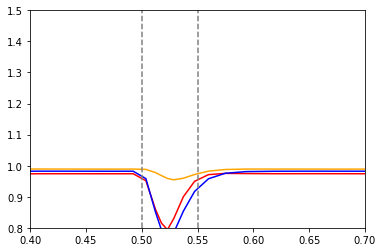

In [149]:
t = result_rk45.t
wsol = result_rk45.y

m0 = np.mean(frate(wsol[0]))
m1 = np.mean(frate(wsol[1]))
m4 = np.mean(frate(wsol[2]))
plt.plot(t, frate(wsol[0])/m0, c='red')
plt.plot(t, frate(wsol[1])/m1, c='blue')
plt.plot(t, frate(wsol[2])/m4, c='orange')

plt.plot([0.5,0.5],[0.8,2],'--',c='gray')
plt.plot([0.55,0.55],[0.8,2],'--',c='gray')
plt.ylim(0.8,1.5)
plt.xlim(0.4,0.7)

In [40]:
wsol[:,3]


array([0.        , 0.09525313, 0.18143312, 0.25940428, 0.32994831,
       0.39377276, 0.45151778, 0.50376242, 0.55103059, 0.59379632,
       0.63248846, 0.66749499, 0.69916723, 0.72782264, 0.75374844,
       0.7772047 , 0.79842664, 0.81762713, 0.83499875, 0.85071564,
       0.86493545, 0.87780077, 0.88944064, 0.8999718 , 0.90949989,
       0.91812032, 0.92591964, 0.93297604, 0.93936028, 0.94513642,
       0.95036235, 0.95509051, 0.9593683 , 0.96323859, 0.96674024,
       0.96990833, 0.97277466, 0.97536797, 0.97771425, 0.97983705,
       0.98175763, 0.98349527, 0.9850674 , 0.98648978, 0.98777668,
       0.98894099, 0.9899944 , 0.99094746, 0.99180975, 0.99258992,
       0.99329576, 0.99393435, 0.99451209, 0.99503481, 0.99550774,
       0.99593561, 0.99632275, 0.99667302, 0.99698991, 0.99727664,
       0.99753605, 0.99777074, 0.99798308, 0.9981752 , 0.99834901,
       0.99850628, 0.99864855, 0.99877725, 0.99889371, 0.9989991 ,
       0.99909444, 0.9991807 , 0.99925875, 0.99932937, 0.99939